# Dinheiro traz felicidade??

Vamos criar um modelo simples para prever o índice de felicidade de acordo com o PIB per capita do país.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/alexvaroz/data_science_alem_do_basico/master/world-happiness-report-2015-2022-cleaned.csv',
    encoding='latin1')

In [ ]:
df.head()

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.4363,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.459,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [ ]:
df.Year.value_counts()

2015    158
2016    157
2019    156
2017    155
2018    155
2020    153
2021    149
2022    146
Name: Year, dtype: int64

In [ ]:
df.dtypes

Unnamed: 0                        int64
Happiness Rank                    int64
Country                          object
Region                           object
Happiness Score                  object
Economy (GDP per Capita)         object
Family (Social Support)          object
Health (Life Expectancy)         object
Freedom                          object
Trust (Government Corruption)    object
Generosity                       object
Year                              int64
dtype: object

In [ ]:
for item in ['Economy (GDP per Capita)', 'Happiness Score',
             'Family (Social Support)', 'Health (Life Expectancy)', 
             'Freedom', 'Trust (Government Corruption)', 'Generosity']:
             df[item] = df[item].str.replace(',', '.')
             df[item] = df[item].astype('float')

Vamos plotar a relação entre as duas variáveis para o ano de 2022:

In [ ]:
df[df.Year == 2022]

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
1083,0,1,Finland,Western Europe,7.821,1.892,1.258,0.775,0.736,0.534,0.109,2022
1084,1,2,Denmark,Western Europe,7.636,1.953,1.243,0.777,0.719,0.532,0.188,2022
1085,2,3,Iceland,Western Europe,7.557,1.936,1.320,0.803,0.718,0.191,0.270,2022
1086,3,4,Switzerland,Western Europe,7.512,2.026,1.226,0.822,0.677,0.461,0.147,2022
1087,4,5,Netherlands,Western Europe,7.415,1.945,1.206,0.787,0.651,0.419,0.271,2022
...,...,...,...,...,...,...,...,...,...,...,...,...
1224,141,142,Botswana*,-,3.471,1.503,0.815,0.280,0.571,0.102,0.012,2022
1225,142,143,Rwanda*,-,3.268,0.785,0.133,0.462,0.621,0.544,0.187,2022
1226,143,144,Zimbabwe,Sub-Saharan Africa,2.995,0.947,0.690,0.270,0.329,0.105,0.106,2022
1227,144,145,Lebanon,Middle East and Northern Africa,2.955,1.392,0.498,0.631,0.103,0.034,0.082,2022


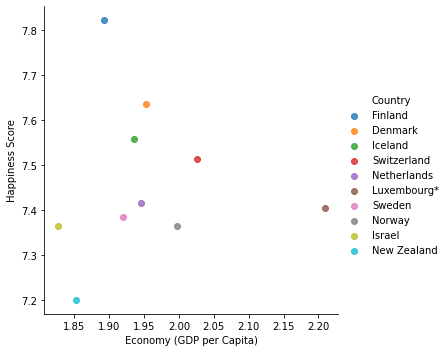

In [ ]:
sns.lmplot(x='Economy (GDP per Capita)', y='Happiness Score', data=df[df.Year == 2022][:10],
           fit_reg=False, hue='Country')# sem linha de regressão

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
df

In [ ]:
X = df.drop(['Happiness Score', 'Country', 'Region', 'Year', 'Unnamed: 0'], axis=1)
y = df['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.predict(X_test)

array([5.39719797, 6.26015124, 5.09913619, 5.2068503 , 5.3939891 ,
       4.52704554, 6.60944447, 4.35762563, 4.73763457, 4.25435185,
       4.69661624, 6.2847018 , 6.02838197, 4.40743882, 5.54174976,
       4.86193809, 5.84460893, 6.10595569, 4.85193406, 7.00164821,
       3.73249386, 7.20021054, 4.98960127, 5.94012068, 4.61672681,
       4.59254877, 7.25753865, 5.26511847, 6.05503711, 6.3224144 ,
       6.42990588, 5.03025534, 4.50512981, 6.35620019, 3.78346499,
       4.68690881, 7.01928207, 4.6525589 , 6.01099553, 3.52177124,
       4.32006959, 5.25642672, 4.41064471, 6.21440604, 7.00247233,
       5.45950808, 3.79418157, 5.08608052, 7.05111383, 4.14836906,
       3.977068  , 7.39456345, 3.67291646, 6.17586793, 3.99626626,
       3.89237967, 5.70573735, 6.58792056, 5.54246477, 4.47281007,
       3.92958942, 4.76782077, 3.87169295, 3.45870491, 4.86193734,
       4.50145302, 5.62790542, 6.50435425, 5.43815575, 3.92023118,
       3.77658512, 6.42598438, 5.44568918, 4.20816903, 6.66655

In [ ]:
model.score(X_test, y_test)

0.9808867788717454